### How do the musical attributes of tracks change when artists collaborate compared to when they work solo? For example, do collaborations typically result in higher danceability or energy levels?

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Loading the dataset:** 
We first load the dataset and explore it's data (i.e., columns, shape, attributes N/A values etc...) to get a better understanding before cleaning the data.

In [96]:
df = pd.read_csv('../dataset.csv')

In [97]:
df.shape

(114000, 21)

In [98]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

We see some unfamilar column values which we need to further explore such as "key" and "mode" so we will print the unique values to get a better understand of its data. 

In [99]:
print(df['key'].unique())
print(df['mode'].unique())

[ 1  0  2  6 11  8  4  7  3 10  5  9]
[0 1]


We see that the key values range from 0-11 but we still do not know what it represents. So we resort to searching the web. We find a GitHub repo with all the definitions for each column. We can trust that this is a reputable source as our dataset is from huggingface - where we found the definition for each column.

Source: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset/commit/8ea780d5df64e9376f2b2df5987051eea84ff548

- **track_id**: The Spotify ID for the track
- **artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a `;`
- **album_name**: The album name in which the track appears
- **track_name**: Name of the track
- **popularity**: **The popularity of a track is a value between 0 and 100, with 100 being the most popular**. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms**: The track length in milliseconds
- **explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. `0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is -1 (higher number = higher pitch)
- **loudness**: The overall loudness of a track in decibels (dB)
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of `3/4`, to `7/4`.
- **track_genre**: The genre in which the track belongs

We see that - popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, and track_genre are all attributes we should looking into.

In [100]:
df.head(50)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


To further familiarize ourselves with the data, we can view all basic information of the numerical value columns in the dataset. These are all attributes which we should be looking at with the along with "explicit" and "track_genre" which are categorical values.

In [101]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Next, we look into artists to understand how they are formatted so we can determine if the track was a solo or collaboration.

In [102]:
df['artists'].head(50)

0                              Gen Hoshino
1                             Ben Woodward
2                   Ingrid Michaelson;ZAYN
3                             Kina Grannis
4                         Chord Overstreet
5                             Tyrone Wells
6     A Great Big World;Christina Aguilera
7                               Jason Mraz
8                Jason Mraz;Colbie Caillat
9                           Ross Copperman
10                            Zack Tabudlo
11                              Jason Mraz
12                                Dan Berk
13                           Anna Hamilton
14                Chord Overstreet;Deepend
15                             Landon Pigg
16                    Andrew Foy;Renee Foy
17                    Andrew Foy;Renee Foy
18               Jason Mraz;Colbie Caillat
19                 Boyce Avenue;Bea Miller
20                              Jason Mraz
21              Boyce Avenue;Jennel Garcia
22    A Great Big World;Christina Aguilera
23         

From looking at this list, we can see that the artists are separated by a semi colon. We can verify this by Google-ling "Brandi Carlile" and "Lucius" (for index 47-49) separately which says that one is a American singer-songwriter and the other is a band. Personally, I recognize Andrew and Renee Foy (Index 16 and 17) so the assumption that the artists are separated by semi colons is true.
  

## Whats Next?

We can use this determine if a track is a collaboration if we split the artist by ";" and the length is greater than 1. We can then mark that track as a collaboration or solo.
 
But before that we must clean the data first - that is, rows with NaN values for artists are not analysable so we can drop those rows. `track_id`, `track_name` and `album_name` are also irrelevant for this case. We only need `artists` and the attributes columns. We can also drop the `Unnamed: 0` column since is appears to be replicating the index of the dataframe.  

# Outline:
* Data Cleaning 
* EDA 
* Processing
* Analysis 
* Hypothesis Testing
* Conclusion

In [103]:
print(df.shape) #(114000, 21)
df = df[df['artists'].notnull()]
print(df.shape) #(113999, 21)

df_clean = df.drop(['Unnamed: 0', 'track_id', 'track_name', 'album_name'], axis=1)

(114000, 21)
(113999, 21)


We see that we only have one null value for artist.

In [104]:
def solo_or_collab(artists):
    num_of_artists = len(artists.split(';'))
    if num_of_artists > 1:
        return 'collaboration'
    else:
        return 'solo'

df_clean['solo_or_collab'] = df_clean['artists'].astype(str).apply(solo_or_collab)

df_clean

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,solo_or_collab
0,Gen Hoshino,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,solo
1,Ben Woodward,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,solo
2,Ingrid Michaelson;ZAYN,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,collaboration
3,Kina Grannis,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,solo
4,Chord Overstreet,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,solo
113996,Rainy Lullaby,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,solo
113997,Cesária Evora,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,solo
113998,Michael W. Smith,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,solo


In [105]:
df_collab = df_clean[df_clean['solo_or_collab'] == 'collaboration'].reset_index(drop=True)
df_solo = df_clean[df_clean['solo_or_collab'] == 'solo'].reset_index(drop=True)

We then create boxplot to help visualize the data. We will only do this will the numerical columns with the exception of mode, since the only values of mode can be 0 or 1, we can use the mean function to uncover insights. For the categorical columns, we will use a countplot. 

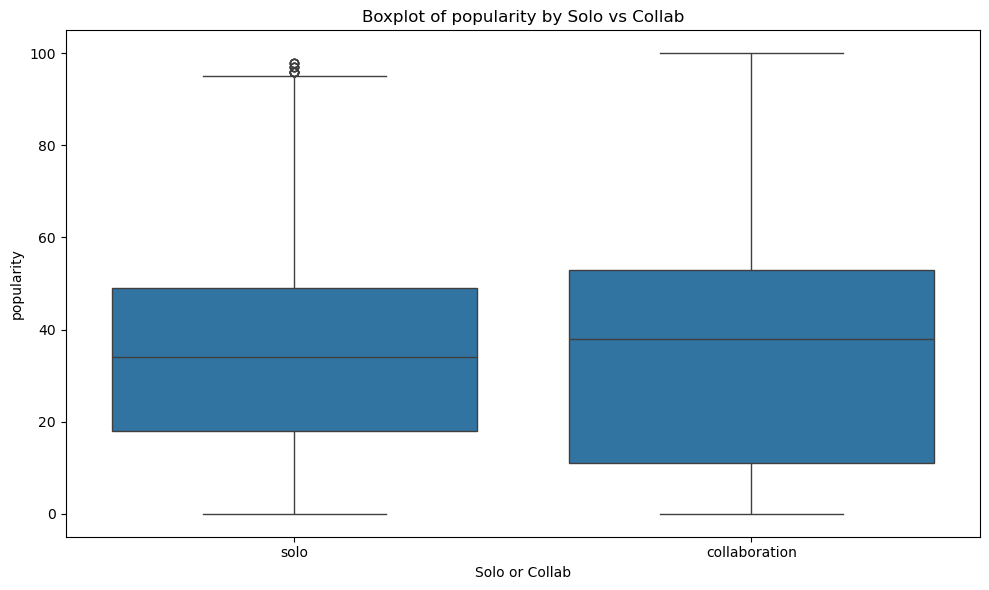

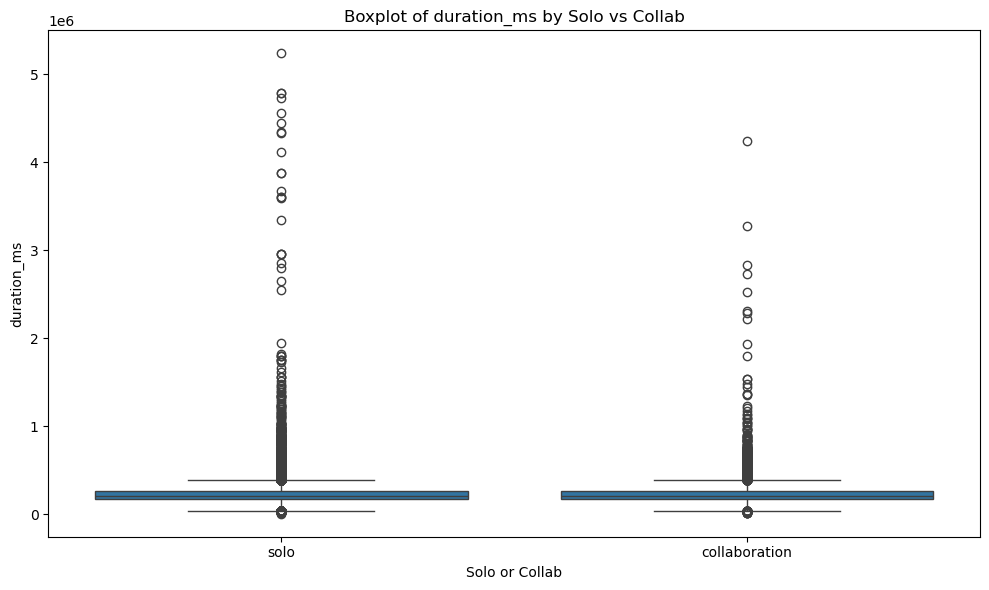

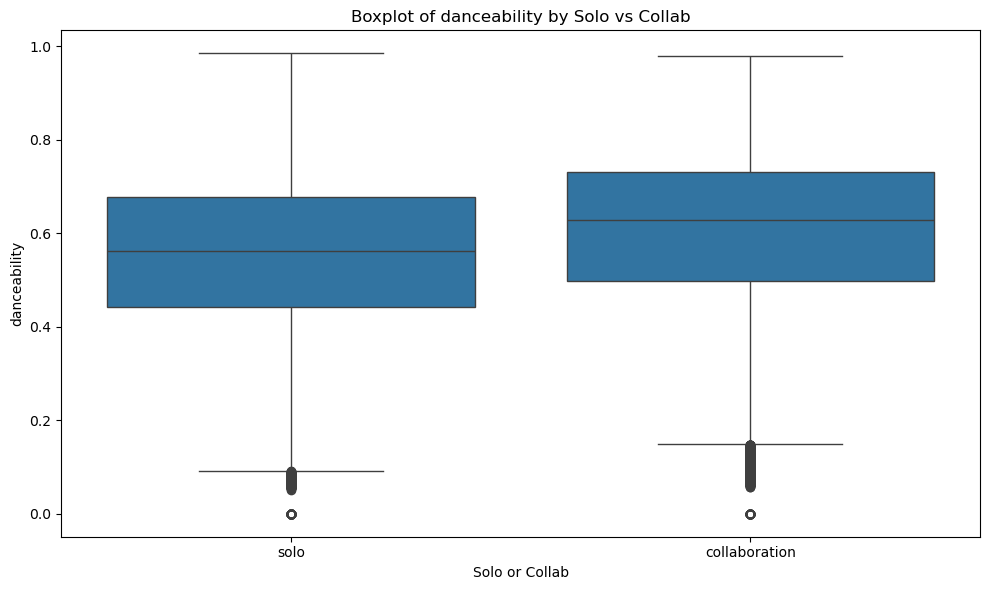

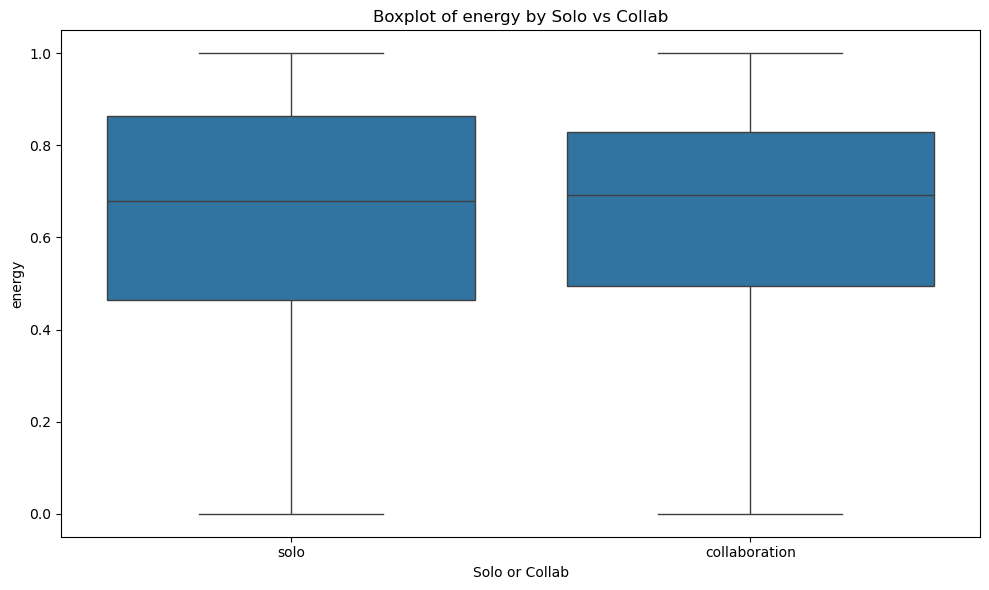

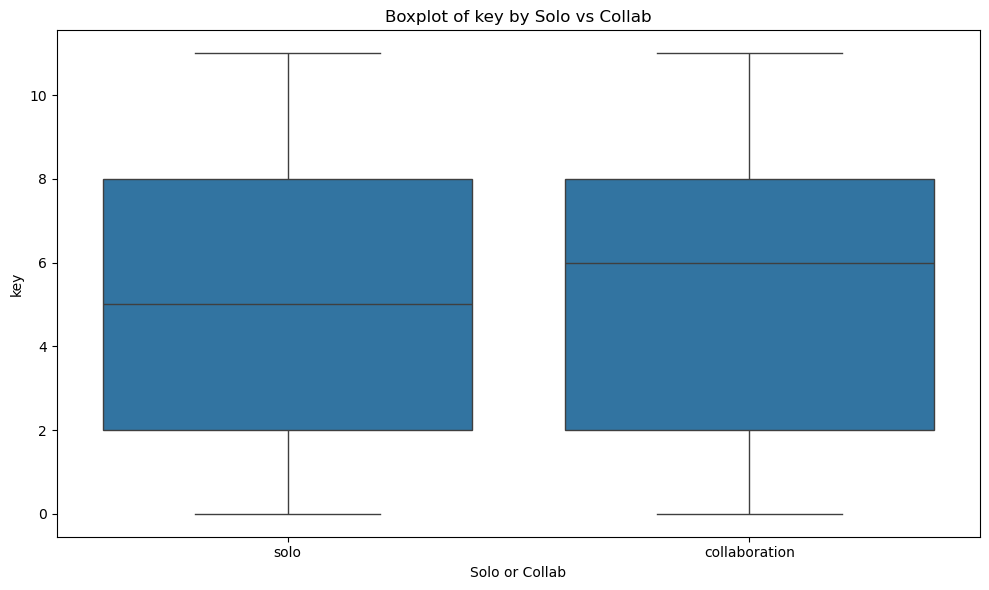

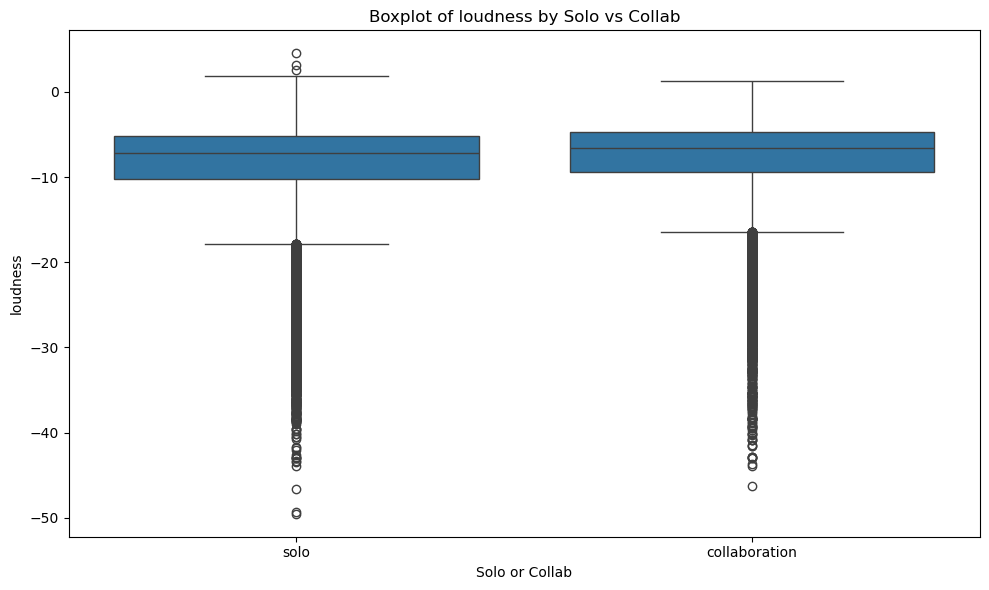

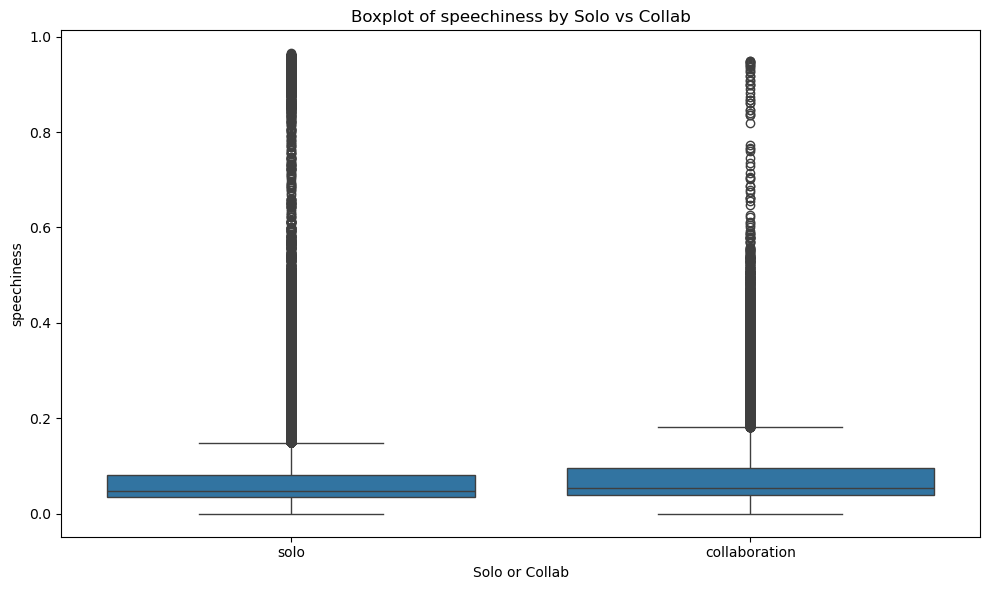

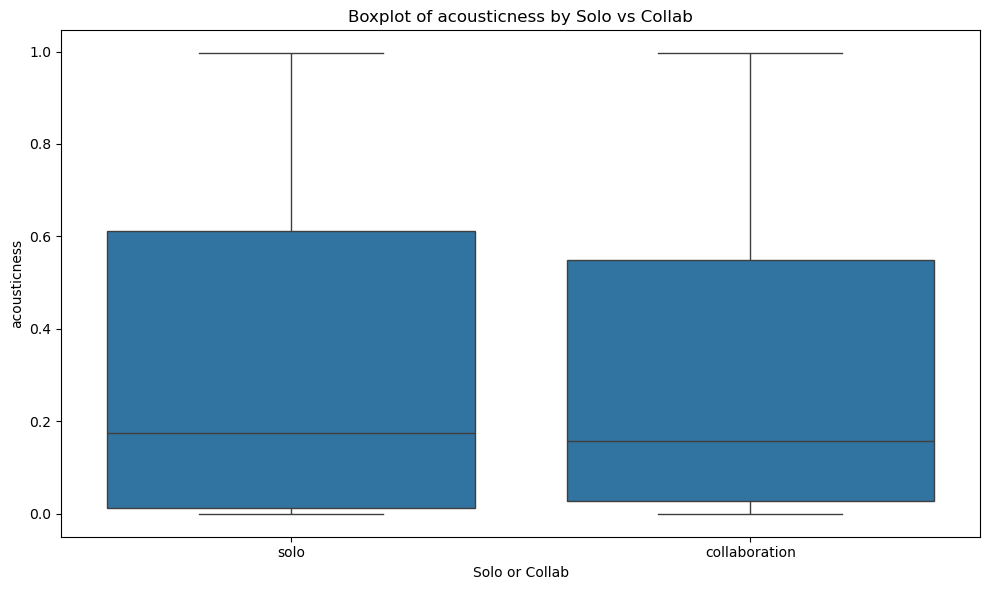

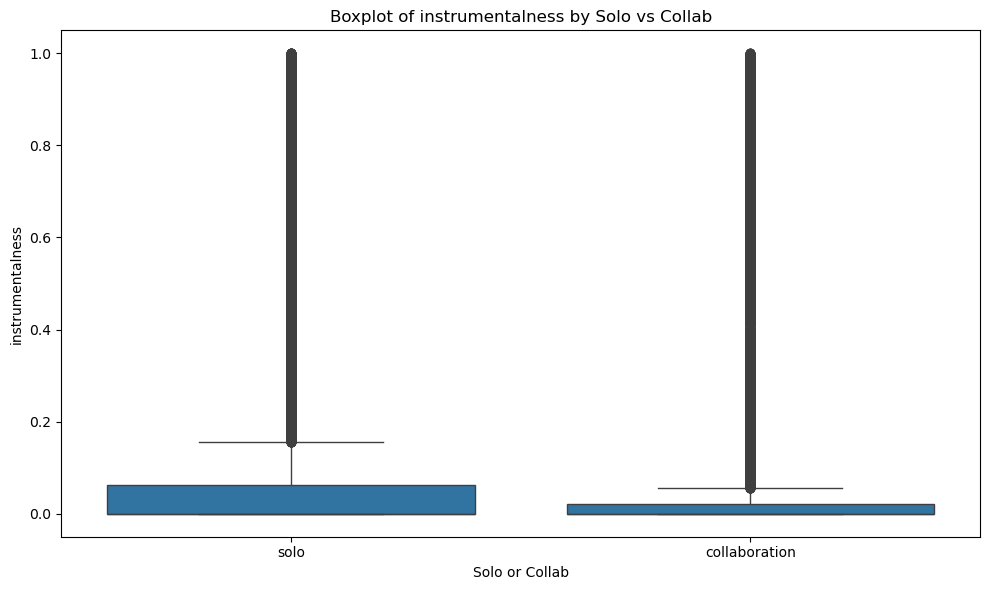

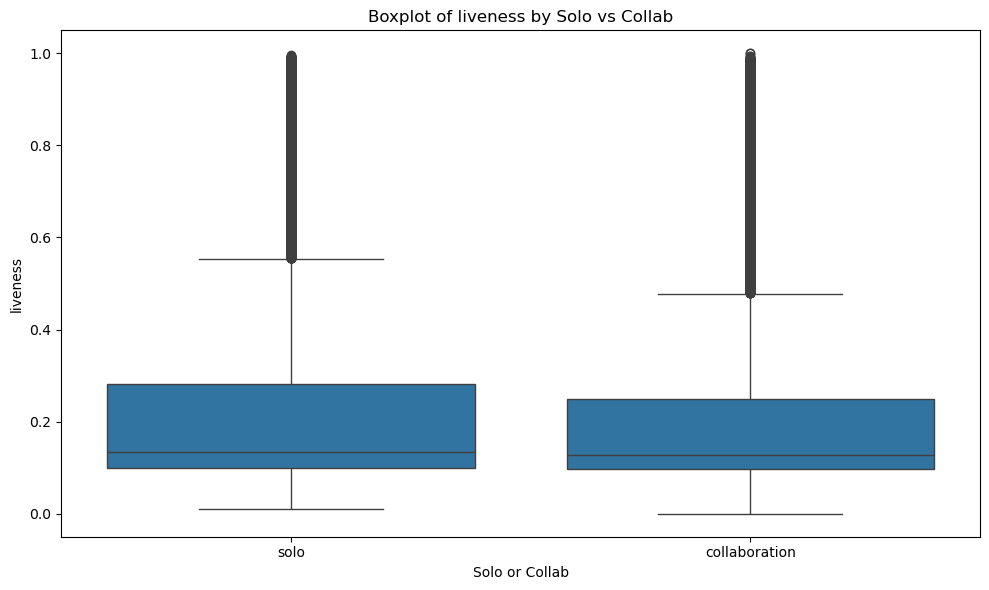

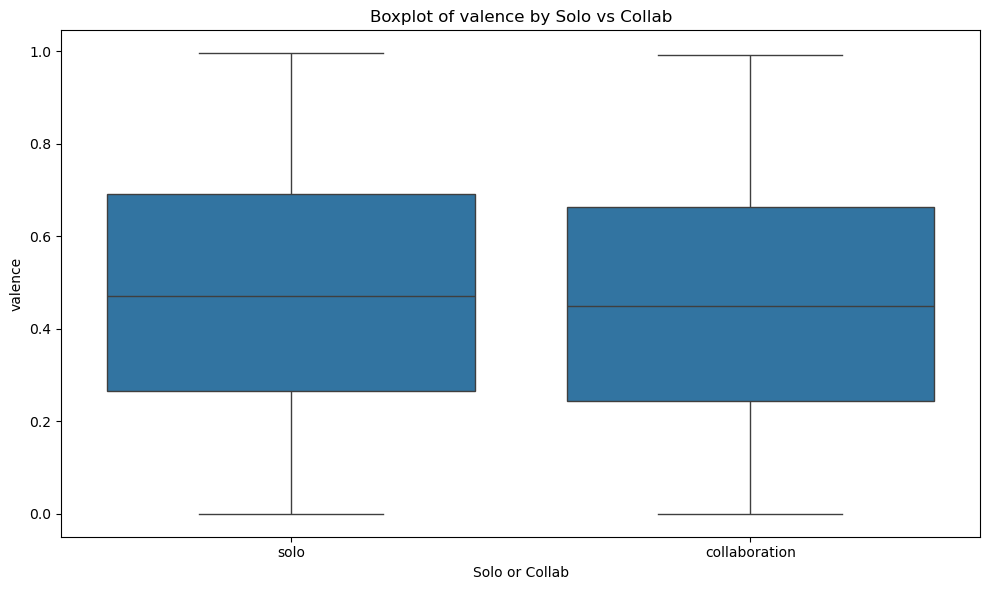

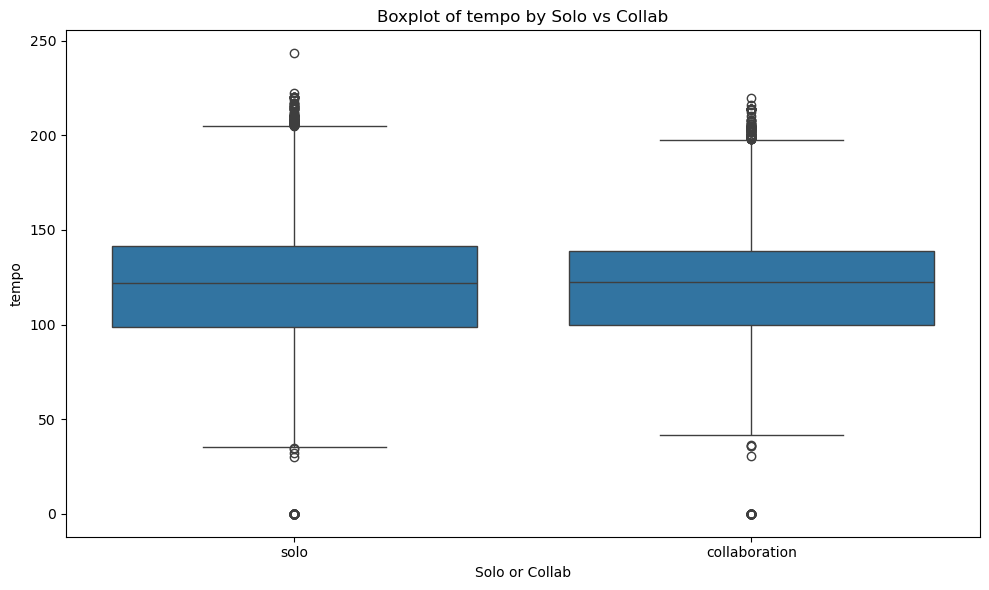

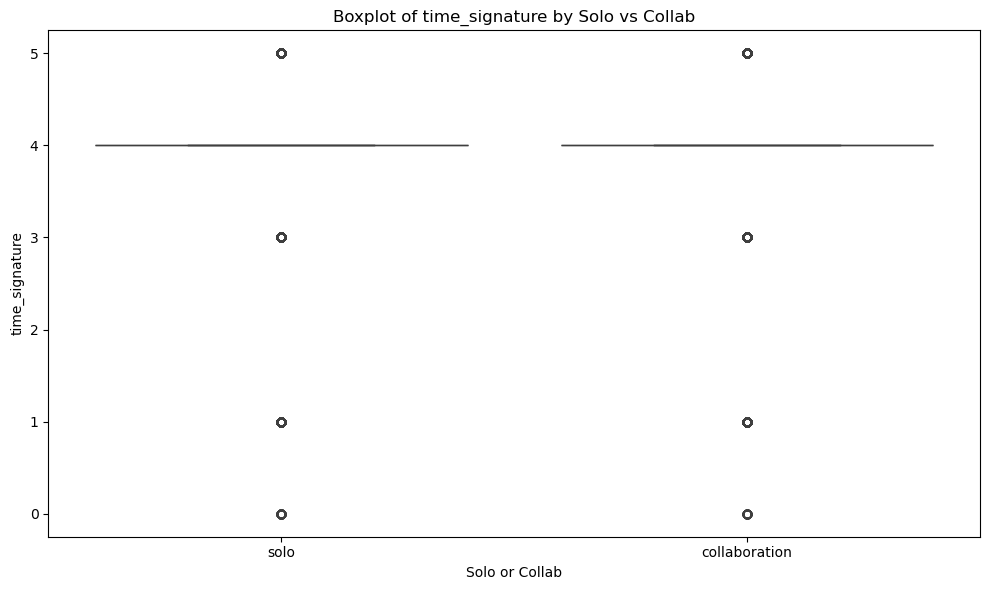

In [106]:
attributes = [
    "popularity",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    # "mode",   
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_clean, x="solo_or_collab", y=attribute)
    plt.title(f'Boxplot of {attribute} by Solo vs Collab')
    plt.xlabel('Solo or Collab')
    plt.ylabel(attribute)
    plt.tight_layout()
    plt.show()
        

## Popularity Analysis
We see that non-solo tracks were generally more popular, that is, collaborative tracks had a higher median and 3rd IQR but lower 1st IQR. Considering the fact that there are significantly more solo tracks and collaborative, it makes sense why collaborative would have a larger spread (standard deviation). In addition, we see that there are outliers for the solo boxplot in the high 90s area. This means that at most, the popularity of solo tracks are in the high 90s. In contrast, the most popular collaborative track has a popularity of 100. This means no solo tracks have a popularity of 100.  

In [107]:
print(f'Max popularity value: {df_solo['popularity'].max()}')
df_solo[df_solo['popularity'] > 97]

Max popularity value: 98


,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,solo_or_collab
49327,Manuel Turizo,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.583,0.000002,0.218,0.85,124.98,4,latin,solo
49775,Manuel Turizo,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.583,0.000002,0.218,0.85,124.98,4,latino,solo
64650,Manuel Turizo,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.583,0.000002,0.218,0.85,124.98,4,reggae,solo
65120,Manuel Turizo,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.583,0.000002,0.218,0.85,124.98,4,reggaeton,solo


## Duration (ms) Analysis
The durations between the solo and collaborative tracks are identical. Is it also important to point out that there are more outlier in solo tracks than collaborative tracks in terms of duration (ms) - this could be due to the significant data we have on solo tracks over collaborative tracks. From this, we see solo and collaborative tracks do not affect the duration (ms). As shown below, they both have relatively similar mean and medians.

In [108]:
print('Mean for Duration (collaboration): ', df_collab['duration_ms'].mean())
print('Mean for Duration (solo): ', df_solo['duration_ms'].mean())
print('-' * 50)
print('Mean for Duration (collaboration): ', df_collab['duration_ms'].median())
print('Mean for Duration (solo): ', df_solo['duration_ms'].median())

Mean for Duration (collaboration):  230085.34197838735
Mean for Duration (solo):  227295.0144773843
--------------------------------------------------
Mean for Duration (collaboration):  210947.0
Mean for Duration (solo):  213733.0


## Danceability Analysis
Collaborative tracks are on average more danceable than solo tracks. With similar interquartile ranges (size of box), the median of collaborative tracks is higher. The minimum whisker for collaborative tracks is higher than solo tracks. In addition, we must take into account that we have significantly more data point for solo tracks than collaborative tracks so the data for collaborative may not be as reliable as solo tracks. But when we use the `describe()` function, we see that the minimum and standard deviation values are similar between solo and collaborative tracks. The noticeable differences are the `mean`, `25%`, `50%`, and `75%` values which favour collaborative tracks. We say it is noticeable when the difference between the two values (i.e., mean value of the danceability of solo and collaborative tracks) is greater than 0.05.  

In [109]:
print(df_solo['danceability'].describe())
print('-' * 50)
print(df_collab['danceability'].describe())

count    83924.000000
mean         0.553514
std          0.171378
min          0.000000
25%          0.443000
50%          0.563000
75%          0.678000
max          0.985000
Name: danceability, dtype: float64
--------------------------------------------------
count    30075.000000
mean         0.603876
std          0.174169
min          0.000000
25%          0.498500
50%          0.629000
75%          0.732000
max          0.979000
Name: danceability, dtype: float64


## Energy Analysis
There are similar medians for the energy boxplots. However, the range for the box is different. While they both have very similar medians - with collaborative tracks having a slight edge, the energy for solo tracks has a higher standard deviation than collaborative tracks. In other words, energy levels for solo tracks are more spread out and collaborative tracks are more clustered together. We can visualize this with numbers instead of a boxplot. We see that the range of the 50% of the energy levels are between [0.46, 0.86] for solo tracks and [0.50, 0.83] for collaborative tracks. Thus, we can say that the energy levels for solo tracks are more spread out because of the larger range, and our summary reveals it has a higher standard deviation than collabs. 

In [110]:
print(df_solo['energy'].describe())
print('-' * 50)
print(df_collab['energy'].describe())

count    83924.000000
mean         0.642115
std          0.254160
min          0.000020
25%          0.464000
50%          0.680000
75%          0.864000
max          1.000000
Name: energy, dtype: float64
--------------------------------------------------
count    30075.000000
mean         0.639342
std          0.244035
min          0.000000
25%          0.495000
50%          0.693000
75%          0.830000
max          1.000000
Name: energy, dtype: float64


## Key Analysis

Collaborative tracks have a higher median for key values. That is, collaborative tracks are generally include higher pitches sounds compared to solo tracks. In the beginning when found that key values of -1 meant that the key is not defined and the higher the key value, the higher pitch the track is. We see that our minimum key value is 0 so we can confidently say that this boxplot is a visual for keys in solo and collaborative tracks. If we had a lot of undefined key values in collaborative tracks, it would make this visual less accurate as we would have significantly more solo keys value than collaborative tracks than we already have.
Moreover, we see that they have a mean value of a 5.4 and 5.3 which is similar. This would be part of the F note class which sounds like "fa." In comparison to there median values, solo tracks on average (median) are classified as part of the F note class whereas collaborative tracks on average (median) are classified as part of the F# (F sharp) and Gb (G-flat major) class.

In [111]:
print(df_solo['key'].describe())
print('-' * 50)
print(df_collab['key'].describe())

count    83924.000000
mean         5.281517
std          3.554055
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64
--------------------------------------------------
count    30075.000000
mean         5.386168
std          3.575467
min          0.000000
25%          2.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64


## Loudness Analysis

Both the loudness for solo and collaborative tracks are similar. It is also important to point out that the loudness (measured in dB) are mainly negative values. This means that the sound level is weaker than the reference level. For example 0 dB is the threshold of the human beings - the quietest sound a human can hear under normal conditions. However, if you are in a studio booth with soundproof walls, sounds can be less detectable hence the negative values for dB.


## Speechiness

Both solo and collaborative tracks share similar speechiness. As defined earlier, speechiness referes to the level of music and vocals. The higher than speechiness value, the more words spoken in the track with 1 being speech-like recordings without music, and 0 being no words spoken and music only. We see that they have a mean and median speechiness value of less than 0.10, which indicates that these tracks are primarily music with minimal words spoken. There are also significantly more outliers for solo tracks as we have a higher sample size for solo tracks in comparison to collaborative tracks.  

In [112]:
print(df_solo['speechiness'].describe())
print('-' * 50)
print(df_collab['speechiness'].describe())

count    83924.000000
mean         0.082770
std          0.110289
min          0.000000
25%          0.034900
50%          0.047500
75%          0.080700
max          0.965000
Name: speechiness, dtype: float64
--------------------------------------------------
count    30075.000000
mean         0.089904
std          0.091628
min          0.000000
25%          0.038900
50%          0.053200
75%          0.096000
max          0.950000
Name: speechiness, dtype: float64


## Acousticness Analysis

A track has high confidence in acousticness when the value is closer to 1. From the box plot, we see that both solo and collaborative tracks are not very acoustic. For the most part there values are identical, suggesting that there is not a correlation between solo and collaborative tracks in terms of acousticness. However, the value of 3rd quartile is higher for solo tracks compared to collaborative tracks. In addition, the 3rd quartile value is still low, making the majority of overall tracks low to mildly acoustic. 

In [113]:
print(df_solo['acousticness'].describe()) 
print('-' * 50)
print(df_collab['acousticness'].describe())
df_solo['acousticness'].quantile(0.75)

count    83924.000000
mean         0.318946
std          0.334413
min          0.000000
25%          0.012900
50%          0.175000
75%          0.612000
max          0.996000
Name: acousticness, dtype: float64
--------------------------------------------------
count    30075.000000
mean         0.303634
std          0.326930
min          0.000000
25%          0.027800
50%          0.157000
75%          0.548000
max          0.996000
Name: acousticness, dtype: float64


0.612

## Instrumentalness Analysis

We previously said that instrumentalness describes how much music contents there were compared to vocals (spoken words). We include sounds like "ooh" and "aah" as music contents because they are more related to instruments than words. This attribute is the opposite of speechiness. In speechiness, we saw that solo and collaborative tracks were low in speechiness - meaning that the tracks were mainly composed of music rather than spoken words. In our instrumentalness box plot, we are contradicting the speechiness box plot. The instrumentalness box plot suggests that the majority of tracks for solo and collaborative songs are low in instrumentalness, referring to high speechiness but this does not align with the speechiness box plot so further investigation is needed understand why this is. But, if we compare the instrumentalness values of solo and collaborative tracks, they have similar medians but the solo box plot range is larger. Additionally, both boxes have a lot of outliers. When we use the `describe` function, we see that the means are significantly greater than the median which means that the outliers are very significant. But we know that max instrumentalness value is 1 so there must be a lot of close-to-0 values which is evident as the median is almost 0. It would seem reasonable to drop the values of 0 but there are possibilities of podcasts, typically containing spoken words only so we cannot drop these values. However, we can visualize what the box plot would look like without the 0.0 values. This may not be accurate but could be insightful since there is also a possibility that 0.0 is used as the default value for tracks without an instrumentalness value. 

In [114]:
print(df_solo['instrumentalness'].describe())
print('-' * 50)
print(df_collab['instrumentalness'].describe())

count    83924.000000
mean         0.161825
std          0.314479
min          0.000000
25%          0.000000
50%          0.000055
75%          0.062100
max          1.000000
Name: instrumentalness, dtype: float64
--------------------------------------------------
count    30075.000000
mean         0.139937
std          0.294791
min          0.000000
25%          0.000000
50%          0.000021
75%          0.022000
max          1.000000
Name: instrumentalness, dtype: float64


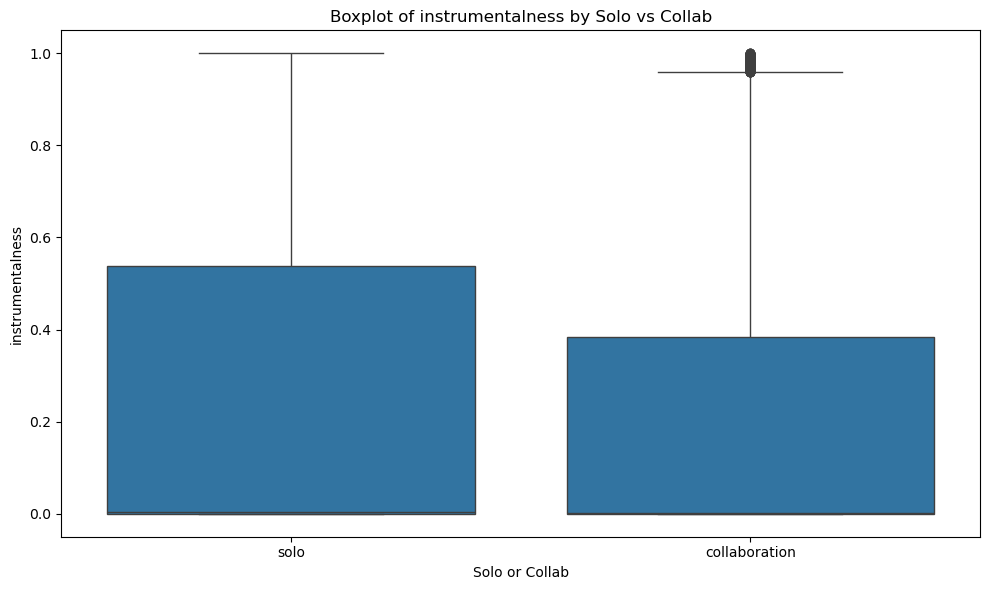

In [115]:
plt.figure(figsize=(10, 6))

temp_df = df_clean[df_clean['instrumentalness'] != 0.0]

sns.boxplot(data=temp_df, x="solo_or_collab", y='instrumentalness')
plt.title('Boxplot of instrumentalness by Solo vs Collab')
plt.xlabel('Solo or Collab')
plt.ylabel('instrumentalness')
plt.tight_layout()
plt.show()


In [116]:
print(temp_df[temp_df['solo_or_collab'] == 'solo']['instrumentalness'].describe())
print('-' * 50)
print(temp_df[temp_df['solo_or_collab'] == 'collaboration']['instrumentalness'].describe())

count    55954.000000
mean         0.242718
std          0.358748
min          0.000001
25%          0.000055
50%          0.004580
75%          0.538000
max          1.000000
Name: instrumentalness, dtype: float64
--------------------------------------------------
count    19282.000000
mean         0.218266
std          0.344165
min          0.000001
25%          0.000031
50%          0.002200
75%          0.384000
max          1.000000
Name: instrumentalness, dtype: float64


As expected, we see that the 1st quartile and 3rd quartile increased significantly. Although the median is still low, the size of the box is bigger. That is, the difference between the 1st quartile and 3rd quartile has increased. This might better represent the previous plot because if our speechiness suggests a low value, the instrumentalness value must be higher. There are inaccuracies but this plot better aligns with the speechiness plot. In terms of correlation, we see that solo tracks are typically more instrumental than collaborative track. Both of our box plots agree with this.

## Liveness Analysis

The box plots are similar for liveness with the solo tracks having a larger range between the 1st quartile and 3rd quartile. From this, it does not look like the musical attribute - liveness change when artists work solo or collaborate.

In [122]:
print(df_solo['liveness'].describe())
print('-' * 50)
print(df_collab['liveness'].describe())

count    83924.000000
mean         0.217578
std          0.194768
min          0.009250
25%          0.098500
50%          0.133000
75%          0.281000
max          0.997000
Name: liveness, dtype: float64
--------------------------------------------------
count    30075.000000
mean         0.202326
std          0.177075
min          0.000000
25%          0.096200
50%          0.128000
75%          0.249000
max          1.000000
Name: liveness, dtype: float64


## Valence Analysis

Valence represents the positivity and negativity of a track. The higher the valence value, the more happy the track will sound like and the lower the valence value, the more sad and angry the track will sound like. In our box plot, we have identical boxes which suggests how happy, sad, or angry a track sounds - it has no correlation with artists who work solo or collaborate. It is evident that both boxes are identical as shown below:

In [123]:
print(df_solo['valence'].describe())
print('-' * 50)
print(df_collab['valence'].describe())

count    83924.000000
mean         0.480210
std          0.261601
min          0.000000
25%          0.265000
50%          0.470000
75%          0.690000
max          0.995000
Name: valence, dtype: float64
--------------------------------------------------
count    30075.000000
mean         0.456921
std          0.251830
min          0.000000
25%          0.244000
50%          0.449000
75%          0.662000
max          0.992000
Name: valence, dtype: float64


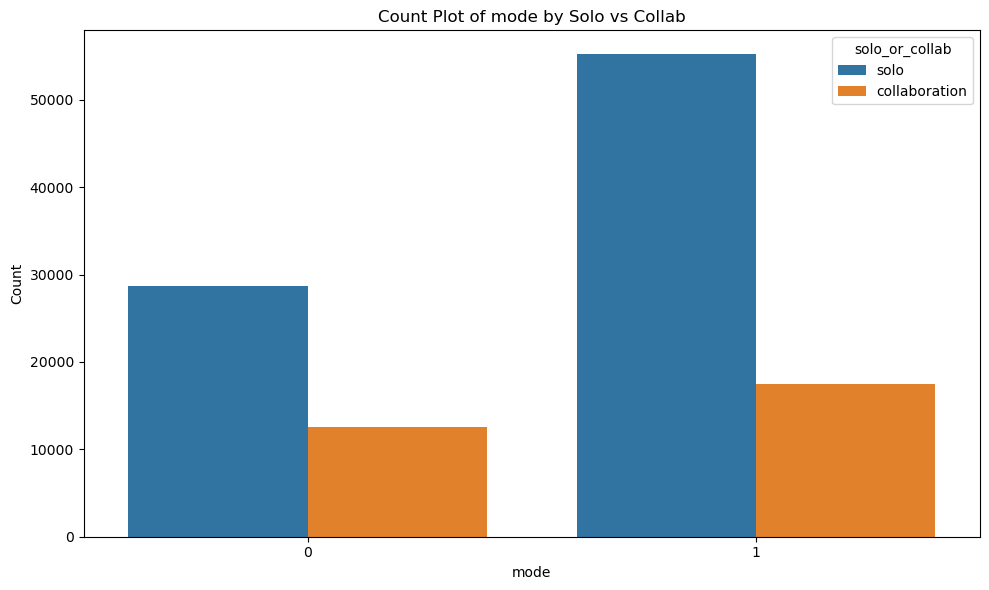

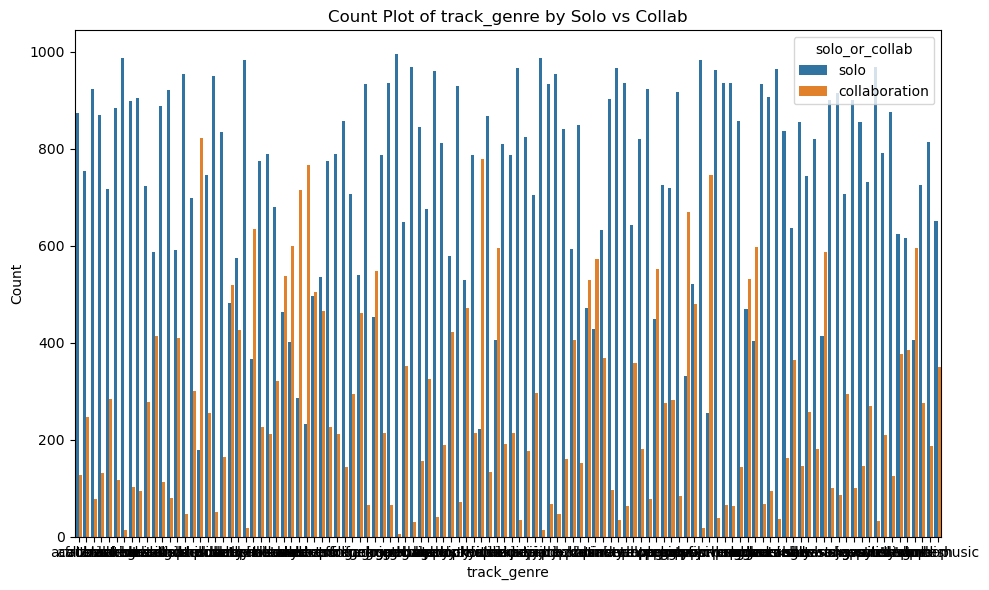

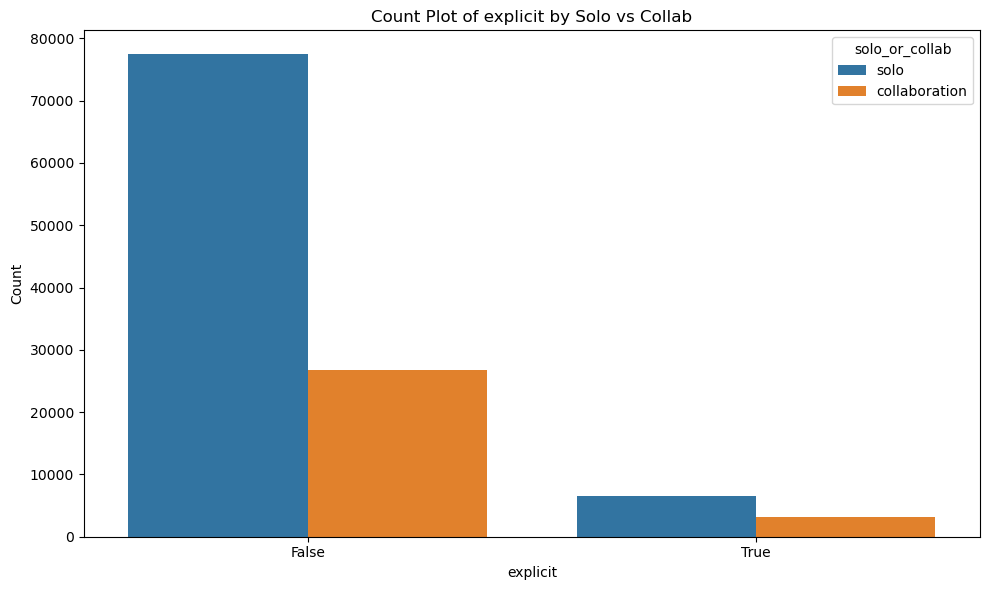

In [117]:
attributes = [
    'mode',
    'track_genre',
    'explicit',
]

for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clean, x=attribute, hue="solo_or_collab")
    plt.title(f'Count Plot of {attribute} by Solo vs Collab')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    

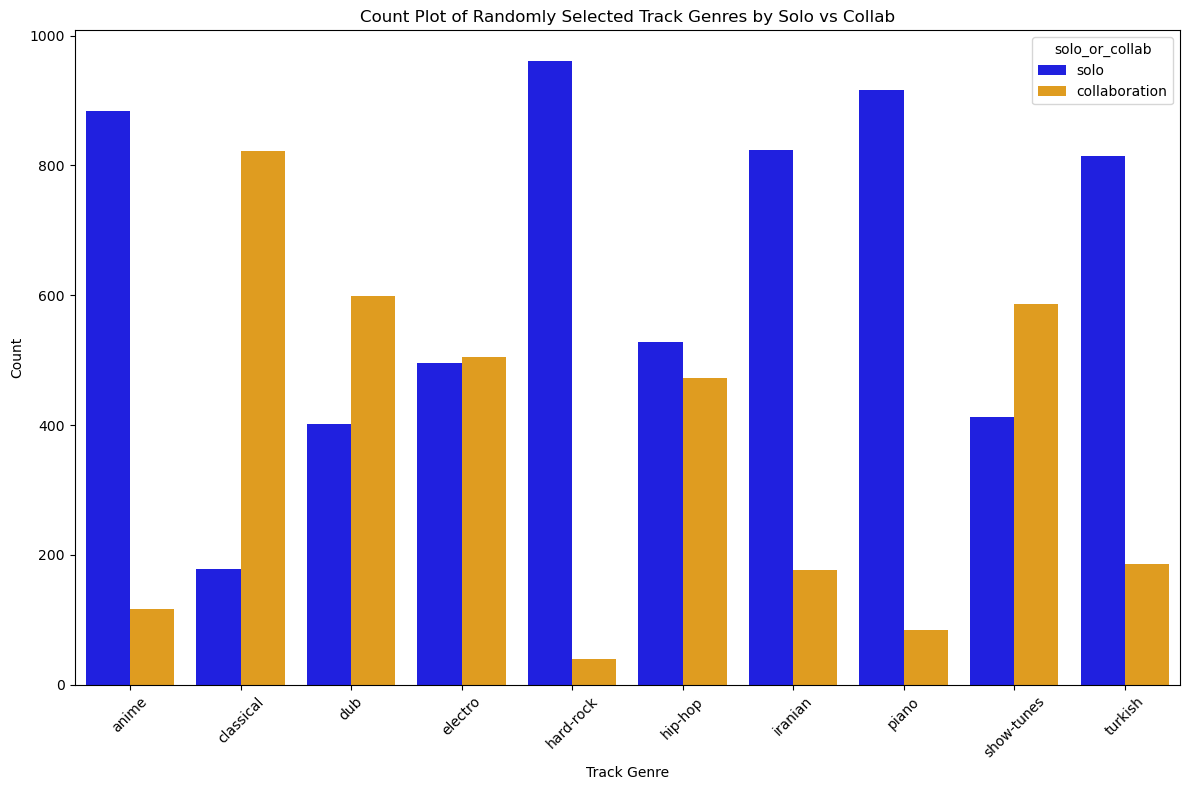

In [118]:
unique_genres = df_clean['track_genre'].unique()
random_genres = np.random.choice(unique_genres, 10, replace=False)

df_simulation = df_clean[df_clean['track_genre'].isin(random_genres)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_simulation, x='track_genre', hue='solo_or_collab', palette={'solo': 'blue', 'collaboration': 'orange'})
plt.title('Count Plot of Randomly Selected Track Genres by Solo vs Collab')
plt.xlabel('Track Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

In [119]:
df_solo['track_genre'].value_counts()
df_collab['track_genre'].value_counts()

more_collab = 0
more_solo = 0

for genre in df_clean['track_genre'].unique():
    if df_collab[df_collab['track_genre'] == genre].shape[0] > df_solo[df_solo['track_genre'] == genre].shape[0]:
        print(f'Genre: {genre}')
        print(f'Solo: {df_solo[df_solo["track_genre"] == genre].shape[0]}')
        print(f'Collab: {df_collab[df_collab["track_genre"] == genre].shape[0]}')
        print('-' * 50)
        more_collab += 1
    else:
      more_solo += 1

print(f'There are {more_collab} genres with more collaborations than solo songs and\
  {more_solo} genres with more solo songs than collaborations out of \
  {len(df_clean["track_genre"].unique())} genres.')
        

Genre: classical
Solo: 178
Collab: 822
--------------------------------------------------
Genre: dance
Solo: 482
Collab: 518
--------------------------------------------------
Genre: deep-house
Solo: 366
Collab: 634
--------------------------------------------------
Genre: drum-and-bass
Solo: 462
Collab: 538
--------------------------------------------------
Genre: dub
Solo: 401
Collab: 599
--------------------------------------------------
Genre: dubstep
Solo: 286
Collab: 714
--------------------------------------------------
Genre: edm
Solo: 233
Collab: 767
--------------------------------------------------
Genre: electro
Solo: 495
Collab: 505
--------------------------------------------------
Genre: german
Solo: 453
Collab: 547
--------------------------------------------------
Genre: house
Solo: 222
Collab: 778
--------------------------------------------------
Genre: indian
Solo: 406
Collab: 594
--------------------------------------------------
Genre: latin
Solo: 471
Collab: 529


In [120]:
df_clean['track_genre'].unique()


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow